In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
data = pd.read_csv('D:/20211/KHDL/KHDL_IT4930/dataset/data.csv', sep='\t', index_col=0)
data

,kieu_dang,hop_so,km_da_di,nhien_lieu,so_cho_ngoi,tinh_trang,xuat_xu,nam_sx,gia,dong_xe,hang
0,Sedan,Tự động,9000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2019,4.480000e+09,Sclass,Mercedes Benz
1,Sedan,Tự động,20000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2017,1.155000e+09,Cclass,Mercedes Benz
2,SUV / Cross over,Tự động,0,Xăng,5,Mới,Lắp ráp trong nước,2021,5.790000e+08,Kona,Hyundai
3,SUV / Cross over,Tự động,0,Xăng,5,Mới,Lắp ráp trong nước,2021,8.250000e+08,Tucson,Hyundai
4,Sedan,Tự động,32000,Xăng,4,Đã sử dụng,Nhập khẩu,2017,5.750000e+09,Panamera,Porsche
...,...,...,...,...,...,...,...,...,...,...,...
41143,SUV / Cross over,Số sàn,200000,Xăng,8,Đã sử dụng,Lắp ráp trong nước,2009,2.800000e+08,Zinger,Mitsubishi
41144,Sedan,Tự động,38000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2018,5.630000e+08,3,Mazda
41145,Hatchback,Tự động,70000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2009,1.850000e+08,Morning,Kia
41146,Sedan,Số sàn,2555,Xăng,5,Đã sử dụng,Nhập khẩu,1999,4.250000e+07,Matiz,Daewoo


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41148 entries, 0 to 41147
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   kieu_dang    41148 non-null  object 
 1   hop_so       41148 non-null  object 
 2   km_da_di     41148 non-null  int64  
 3   nhien_lieu   41148 non-null  object 
 4   so_cho_ngoi  41148 non-null  int64  
 5   tinh_trang   41148 non-null  object 
 6   xuat_xu      41148 non-null  object 
 7   nam_sx       41148 non-null  int64  
 8   gia          41148 non-null  float64
 9   dong_xe      41148 non-null  object 
 10  hang         41148 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 3.8+ MB


In [ ]:
categorical_key = ['tinh_trang', 'hang','dong_xe','xuat_xu', 'kieu_dang', 'nhien_lieu', 'hop_so']
categorical_features = {}
for c in categorical_key:
  categorical_features[c] = sorted(data[c].unique())

import json
with open('categorical_features.json', 'w', encoding = 'utf-8') as f:
  json.dump(categorical_features, f)

In [4]:
data_encoded = pd.get_dummies(data, columns=['tinh_trang', 'hang', 'dong_xe', 'xuat_xu', 'kieu_dang', 'nhien_lieu', 'hop_so'])
data_encoded

,km_da_di,so_cho_ngoi,nam_sx,gia,tinh_trang_Mới,tinh_trang_Đã sử dụng,hang_Acura,hang_Audi,hang_BMW,hang_Bentley,...,kieu_dang_Truck,kieu_dang_Van/Minivan,kieu_dang_Wagon,nhien_lieu_Dầu,nhien_lieu_Hybrid,nhien_lieu_Xăng,nhien_lieu_Điện,hop_so_Bán tự động,hop_so_Số sàn,hop_so_Tự động
0,9000,5,2019,4.480000e+09,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,20000,5,2017,1.155000e+09,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,5,2021,5.790000e+08,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,5,2021,8.250000e+08,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,32000,4,2017,5.750000e+09,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41143,200000,8,2009,2.800000e+08,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
41144,38000,5,2018,5.630000e+08,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
41145,70000,5,2009,1.850000e+08,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
41146,2555,5,1999,4.250000e+07,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
features = {}
for col in data_encoded.columns:
  features[col] = len(features)
features = dict(sorted(features.items(), key = lambda item : item[1]))

import json
with open('all_features.json', 'w', encoding = 'utf-8') as f:
  json.dump(features, f)

In [5]:
stats = data_encoded.describe()
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
km_da_di,41148.0,1.471698e+05,2.497685e+06,0.0,20000.0,60000.0,110000.0,3.000000e+08
so_cho_ngoi,41148.0,5.719452e+00,2.211953e+00,2.0,5.0,5.0,7.0,4.700000e+01
nam_sx,41148.0,2.014503e+03,5.699630e+00,1980.0,2011.0,2016.0,2019.0,2.021000e+03
gia,41148.0,8.001651e+08,1.560205e+09,32000000.0,285000000.0,475000000.0,750000000.0,6.800000e+10
tinh_trang_Mới,41148.0,6.994265e-02,2.550534e-01,0.0,0.0,0.0,0.0,1.000000e+00
...,...,...,...,...,...,...,...,...
nhien_lieu_Xăng,41148.0,8.406484e-01,3.660081e-01,0.0,1.0,1.0,1.0,1.000000e+00
nhien_lieu_Điện,41148.0,1.458151e-04,1.207466e-02,0.0,0.0,0.0,0.0,1.000000e+00
hop_so_Bán tự động,41148.0,3.693983e-03,6.066652e-02,0.0,0.0,0.0,0.0,1.000000e+00
hop_so_Số sàn,41148.0,3.510013e-01,4.772891e-01,0.0,0.0,0.0,1.0,1.000000e+00


In [ ]:
stats.to_csv('stats.csv', sep='\t', encoding='utf-8')

In [6]:
from sklearn import preprocessing
norm = preprocessing.StandardScaler()

data_encoded[data_encoded.columns] = norm.fit_transform(data_encoded)
data_encoded

,km_da_di,so_cho_ngoi,nam_sx,gia,tinh_trang_Mới,tinh_trang_Đã sử dụng,hang_Acura,hang_Audi,hang_BMW,hang_Bentley,...,kieu_dang_Truck,kieu_dang_Van/Minivan,kieu_dang_Wagon,nhien_lieu_Dầu,nhien_lieu_Hybrid,nhien_lieu_Xăng,nhien_lieu_Điện,hop_so_Bán tự động,hop_so_Số sàn,hop_so_Tự động
0,-0.055320,-0.325260,0.789065,2.358587,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,-0.735415,0.741387
1,-0.050916,-0.325260,0.438161,0.227431,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,-0.735415,0.741387
2,-0.058923,-0.325260,1.139970,-0.141756,3.646564,-3.646564,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,-0.735415,0.741387
3,-0.058923,-0.325260,1.139970,0.015918,3.646564,-3.646564,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,-0.735415,0.741387
4,-0.046111,-0.777355,0.438161,3.172593,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,-0.735415,0.741387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41143,0.021152,1.031024,-0.965456,-0.333399,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,1.359777,-1.348822
41144,-0.043709,-0.325260,0.613613,-0.152011,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,-0.735415,0.741387
41145,-0.030897,-0.325260,-0.965456,-0.394290,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,-0.735415,0.741387
41146,-0.057900,-0.325260,-2.719977,-0.485625,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,1.359777,-1.348822


# Split train and test

In [ ]:
from sklearn.model_selection import train_test_split
train_val, test = train_test_split(data, test_size=0.2, random_state=8, 
                               stratify=data[['hop_so','tinh_trang','xuat_xu','nhien_lieu']])
train, val = train_test_split(train_val, test_size=0.2, random_state=8, 
                               stratify=train_val[['hop_so','tinh_trang','xuat_xu','nhien_lieu']])

train.to_csv('train.csv', sep='\t', encoding='utf-8')
val.to_csv('val.csv', sep='\t', encoding='utf-8')
test.to_csv('test.csv', sep='\t', encoding='utf-8')

In [ ]:
train_dataset = data_encoded.iloc[train.index]
val_dataset = data_encoded.iloc[val.index]
test_dataset = data_encoded.iloc[test.index]

train_labels = train_dataset.pop('gia')
val_lables = val_dataset.pop('gia')
test_labels = test_dataset.pop('gia')

In [ ]:
train_dataset = train_dataset.values
train_label = train_labels.values

val_dataset = val_dataset.values
val_label = val_lables.values

test_dataset = test_dataset.values
test_label = test_labels.values

In [ ]:
train_dataset = np.concatenate((train_dataset, val_dataset), axis = 0)
train_label = np.concatenate((train_label,val_label), axis = 0) 

## Read dataset from file

In [40]:
train_dataset = data_encoded.iloc[pd.read_csv(r'D:\20211\KHDL\KHDL_IT4930\dataset\train.csv', sep='\t', index_col=0).index]
val_dataset = data_encoded.iloc[pd.read_csv(r'D:\20211\KHDL\KHDL_IT4930\dataset\val.csv', sep = '\t', index_col = 0).index]
test_dataset = data_encoded.iloc[pd.read_csv(r'D:\20211\KHDL\KHDL_IT4930\dataset\test.csv', sep = '\t', index_col = 0).index]

In [41]:
train_label = train_dataset.pop('gia')
val_label = val_dataset.pop('gia')
test_label = test_dataset.pop('gia')

In [42]:
train_dataset = train_dataset.values
train_label = train_label.values

val_dataset = val_dataset.values
val_label = val_label.values

test_dataset = test_dataset.values
test_label = test_label.values

In [ ]:
train_dataset = np.concatenate((train_dataset, val_dataset), axis = 0)
train_label = np.concatenate((train_label,val_label), axis = 0) 

In [ ]:
train_dataset = np.concatenate((train_dataset, test_dataset), axis = 0)
train_label = np.concatenate((train_label,test_label), axis = 0) 

# Model

In [11]:
import torch
import torch.nn as nn

In [12]:
class Model(nn.Module):
    def __init__(self, input_dim = 390, layer_dim_1 = 64, layer_dim_2 = 32, output_dim = 1, p = 0.1):
        super(Model, self).__init__()
        self.layer_dim_1 = layer_dim_1
        self.input_dim = input_dim
        self.layer_dim_2 = layer_dim_2
        self.output_dim = output_dim
        
        self.hidden_layer_1 = nn.Sequential(
            nn.Linear(input_dim, layer_dim_1),
            nn.ReLU(),
        )

        self.hidden_layer_2 = nn.Sequential(
            nn.Linear(layer_dim_1, layer_dim_2),
            nn.ReLU(),
        )
        self.dropout = nn.Dropout(p=p)
        self.output = nn.Linear(layer_dim_2 , output_dim)

    def forward(self, input):
        # input : batch_size, input_dim
        hidden_1 = self.hidden_layer_1(input)
        hidden_1 = self.dropout(hidden_1)

        hidden_2 = self.hidden_layer_2(hidden_1)
        hidden_2 = self.dropout(hidden_2)

        output = self.output(hidden_2)
        return output

In [43]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, data, label):
        self.data = data
        self.label = label

    def __getitem__(self, index):
        return {
            'data': self.data[index],
            'label' : self.label[index]
        }
    def __len__(self):
        return len(self.label)

train = MyDataset(data = train_dataset, label=train_label)
valid = MyDataset(data = val_dataset, label=val_label)
test = MyDataset(data = test_dataset, label=test_label)

In [44]:
def dataset_batch_iter(dataset, batch_size):
    batch_data = []
    batch_label = []
    for data in dataset:
        batch_data.append(data['data'])
        batch_label.append(data['label'])

        if len(batch_label) == batch_size:
            yield {
                'data' : np.array(batch_data, dtype='float32'),
                'label' : np.array(batch_label)
            }
            batch_label = []
            batch_data = []
    if len(batch_data) > 0:
      yield {
                'data' : np.array(batch_data, dtype='float32'),
                'label' : np.array(batch_label)
            }

In [45]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Model()
model.to(device=device)
mse_loss = nn.MSELoss(reduce='sum')
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
val_loss = []
train_loss = []

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [46]:
def validation(valid_dataset):
    model.eval()
    total_loss = 0
    for batch in tqdm(dataset_batch_iter(valid_dataset, batch_size=64), leave=False):
        input_tensor = torch.Tensor(batch['data']).type(torch.FloatTensor).to(device)
        target_tensor = torch.Tensor(batch['label']).type(torch.FloatTensor).to(device)
        
        pred = model(input_tensor).squeeze()
        optimizer.zero_grad()
        loss = mse_loss(pred, target_tensor)

        total_loss += loss.item()
    avg_loss = total_loss/val_dataset.shape[0]
    val_loss.append(avg_loss)
    return avg_loss

In [ ]:
for epoch in range(200):
    model.train()
    epoch_loss = 0
    for batch in tqdm(dataset_batch_iter(train, 64), leave=False):
        input_tensor = torch.Tensor(batch['data']).type(torch.FloatTensor).to(device)
        target_tensor = torch.Tensor(batch['label']).type(torch.FloatTensor).to(device)

        pred = model(input_tensor).squeeze()
        optimizer.zero_grad()
        loss = mse_loss(pred, target_tensor)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss/train_dataset.shape[0]
    train_loss.append(avg_loss)
    print("Epoch {} with MSE loss : {} \n".format(epoch, avg_loss * 1e2))
    valid_loss = validation(valid_dataset=test)
    print('Valid loss : {}\n'.format(valid_loss * 1e2))
    path = '/content/drive/MyDrive/KHDL/KHDL_IT4930/checkpoints/ann_{}.pt'.format(epoch)
    torch.save(
        {
            'model' : model.state_dict(),
            'optim' : optimizer.state_dict()
        }, path
    )

502it [00:02, 197.30it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 with MSE loss : 10.631140379074239 



Valid loss : 12.227941096240942



Epoch 1 with MSE loss : 9.660473044503094 



Valid loss : 11.713215312248884



Epoch 2 with MSE loss : 9.395006092074457 



Valid loss : 11.480626395775918



Epoch 3 with MSE loss : 9.153316534704386 



Valid loss : 11.365439887203348



Epoch 4 with MSE loss : 8.830821210818073 



Valid loss : 10.846100732193849



Epoch 5 with MSE loss : 8.607363943249549 



Valid loss : 10.566835291683674



Epoch 6 with MSE loss : 8.36289520876101 



Valid loss : 10.252744982678381



Epoch 7 with MSE loss : 8.089056485291552 



Valid loss : 9.965614302927861



Epoch 8 with MSE loss : 7.847649718938043 



Valid loss : 9.77278081588268



Epoch 9 with MSE loss : 7.599293567592384 



Valid loss : 9.37045036530785



Epoch 10 with MSE loss : 7.328309341530489 



Valid loss : 9.231001353327883



Epoch 11 with MSE loss : 7.263583013746758 



Valid loss : 8.989298895008128



Epoch 12 with MSE loss : 7.127229481322549 



Valid loss : 9.227393400299032



Epoch 13 with MSE loss : 6.982795410800785 



Valid loss : 8.814035000446333



Epoch 14 with MSE loss : 7.006469608048995 



Valid loss : 8.953823047284878



Epoch 15 with MSE loss : 6.8183178902867825 



Valid loss : 8.875028039955605



Epoch 16 with MSE loss : 6.833080371295632 



Valid loss : 8.698547215177452



Epoch 17 with MSE loss : 6.815731269483032 



Valid loss : 8.699068160030247



Epoch 18 with MSE loss : 6.740587384191426 



Valid loss : 8.825437040566332



Epoch 19 with MSE loss : 6.650004888311087 



Valid loss : 8.690736516235539



Epoch 20 with MSE loss : 6.615433192937329 



Valid loss : 8.86762762890542



Epoch 21 with MSE loss : 6.605020122225531 



Valid loss : 8.659737236135138



Epoch 22 with MSE loss : 6.472622572723809 



Valid loss : 8.677577212438337



Epoch 23 with MSE loss : 6.516213814384687 



Valid loss : 8.630208911759278



Epoch 24 with MSE loss : 6.410112247483947 



Valid loss : 8.849669031545861



Epoch 25 with MSE loss : 6.403338062227704 



Valid loss : 8.743102588806114



Epoch 26 with MSE loss : 6.460288218413844 



Valid loss : 8.54484995201906



Epoch 27 with MSE loss : 6.4117559799045525 



Valid loss : 8.396739980246192



Epoch 28 with MSE loss : 6.258234561792236 



Valid loss : 8.547318357299307



Epoch 29 with MSE loss : 6.322422446509271 



Valid loss : 8.563920264630443



Epoch 30 with MSE loss : 6.284985752746994 



Valid loss : 8.551121621936684



Epoch 31 with MSE loss : 6.305969339070607 



Valid loss : 8.562266190123271



Epoch 32 with MSE loss : 6.283266163296759 



Valid loss : 8.490369328753262



Epoch 33 with MSE loss : 6.1866161088461125 



Valid loss : 8.542430945313892



Epoch 34 with MSE loss : 6.1991094298770335 



Valid loss : 8.581009052180049



Epoch 35 with MSE loss : 6.248681369735402 



Valid loss : 8.529310183243629



Epoch 36 with MSE loss : 6.232151399641924 



Valid loss : 8.540366026304232



Epoch 37 with MSE loss : 6.225105384272099 



Valid loss : 8.6403879876553



Epoch 38 with MSE loss : 6.136581960983035 



Valid loss : 8.459432870670124



Epoch 39 with MSE loss : 6.267621916055318 



Valid loss : 8.500067745234656



Epoch 40 with MSE loss : 6.177525377465012 



Valid loss : 8.535667570518294



Epoch 41 with MSE loss : 6.144131693084272 



Valid loss : 8.3804957573123



Epoch 42 with MSE loss : 6.1792347992868795 



Valid loss : 8.547357090439899



Epoch 43 with MSE loss : 6.06543055242821 



Valid loss : 8.459927682102157



Epoch 44 with MSE loss : 6.132389350472808 



Valid loss : 8.588460923419916



Epoch 45 with MSE loss : 6.011792596441116 



Valid loss : 8.523478703304695



Epoch 46 with MSE loss : 6.046677499439566 



Valid loss : 8.562147106623833



Epoch 47 with MSE loss : 6.0817333888245155 



Valid loss : 8.420699998868468



Epoch 48 with MSE loss : 6.02309476719399 



Valid loss : 8.419212497196545



Epoch 49 with MSE loss : 5.950787331697273 



Valid loss : 8.441581248077386



Epoch 50 with MSE loss : 5.994438399166153 



Valid loss : 8.391577850628753



Epoch 51 with MSE loss : 6.000698932749406 



Valid loss : 8.477639858868384



Epoch 52 with MSE loss : 6.032633370488174 



Valid loss : 8.39611778512615



Epoch 53 with MSE loss : 5.959517643368752 



Valid loss : 8.39555922413218



Epoch 54 with MSE loss : 5.976094401096113 



Valid loss : 8.503768678845237



Epoch 55 with MSE loss : 5.983909326132156 



Valid loss : 8.51461228432107



Epoch 56 with MSE loss : 5.949893523168705 



Valid loss : 8.278160755743066



Epoch 57 with MSE loss : 5.993944469247258 



Valid loss : 8.387929028685903



Epoch 58 with MSE loss : 6.018006542768012 



Valid loss : 8.430320271565087



Epoch 59 with MSE loss : 6.01545330602102 



Valid loss : 8.423890768636529



Epoch 60 with MSE loss : 5.944718678548003 



Valid loss : 8.435231116331684



Epoch 61 with MSE loss : 5.9646787731654864 



Valid loss : 8.399098361993449



Epoch 62 with MSE loss : 5.91569028163791 



Valid loss : 8.289928994110177



Epoch 63 with MSE loss : 5.969375088427079 



Valid loss : 8.217812784585895



Epoch 64 with MSE loss : 5.919534418362432 



Valid loss : 8.213720082354623



Epoch 65 with MSE loss : 5.871361873479428 



Valid loss : 8.199340699530484



Epoch 66 with MSE loss : 5.860674155786549 



Valid loss : 8.288085380067619



Epoch 67 with MSE loss : 5.8282056828336435 



Valid loss : 8.238214093720533



Epoch 68 with MSE loss : 5.9329212412705115 



Valid loss : 8.292072198645865



Epoch 69 with MSE loss : 5.915026497486474 



Valid loss : 8.205216981738115



Epoch 70 with MSE loss : 5.902765948102758 



Valid loss : 8.315781928523883



Epoch 71 with MSE loss : 5.910554100881868 



Valid loss : 8.416627717871542



Epoch 72 with MSE loss : 5.912744650155345 



Valid loss : 8.439426577891798



Epoch 73 with MSE loss : 5.8553736167302946 



Valid loss : 8.457888038789791



Epoch 74 with MSE loss : 5.8929494320665725 



Valid loss : 8.33589456432002



Epoch 75 with MSE loss : 5.924117160321718 



Valid loss : 8.341708880414863



Epoch 76 with MSE loss : 5.844074541213209 



Valid loss : 8.301742352089674



Epoch 77 with MSE loss : 5.875128229647326 



Valid loss : 8.236190975647052



Epoch 78 with MSE loss : 5.790129067078902 



Valid loss : 8.436480429176859



Epoch 79 with MSE loss : 5.890853200708525 



Valid loss : 8.348011662607089



Epoch 80 with MSE loss : 5.793765490228059 



Valid loss : 8.378068851995453



Epoch 81 with MSE loss : 5.912889362701014 



Valid loss : 8.486753421143826



Epoch 82 with MSE loss : 5.8232873546348625 



Valid loss : 8.374858943800344



Epoch 83 with MSE loss : 5.846000842978195 



Valid loss : 8.306599174969822



Epoch 84 with MSE loss : 5.776524458034413 



Valid loss : 8.405478273534055



Epoch 85 with MSE loss : 5.8875597024684065 



Valid loss : 8.500796480942743



Epoch 86 with MSE loss : 5.7987797625772775 



Valid loss : 8.249993458985745



Epoch 87 with MSE loss : 5.755118475227631 



Valid loss : 8.336770442978239



Epoch 88 with MSE loss : 5.861965317158995 



Valid loss : 8.619178506705794



Epoch 89 with MSE loss : 5.759320080779448 



Valid loss : 8.358119351704282



Epoch 90 with MSE loss : 5.769987234995246 



Valid loss : 8.305646685934894



Epoch 91 with MSE loss : 5.811896581914131 



Valid loss : 8.28111628512628



Epoch 92 with MSE loss : 5.796547548392692 



Valid loss : 8.428438353523514



Epoch 93 with MSE loss : 5.764163559419828 



Valid loss : 8.29676242826211



Epoch 94 with MSE loss : 5.808728997789004 



Valid loss : 8.329013272836724



Epoch 95 with MSE loss : 5.760927447611916 



Valid loss : 8.30691005593018



Epoch 96 with MSE loss : 5.762596071678827 



Valid loss : 8.358432816748973



Epoch 97 with MSE loss : 5.7241398934130885 



Valid loss : 8.616331896589076



Epoch 98 with MSE loss : 5.685046832022497 



Valid loss : 8.409064581148694



Epoch 99 with MSE loss : 5.648800736780153 



Valid loss : 8.610532849650973



Epoch 100 with MSE loss : 5.7481446945007475 



Valid loss : 8.442765202114689



Epoch 101 with MSE loss : 5.753684178263416 



Valid loss : 8.588326349126874



Epoch 102 with MSE loss : 5.694447320799402 



Valid loss : 8.321548746747656



Epoch 103 with MSE loss : 5.729613800689461 



Valid loss : 8.343147668011415



Epoch 104 with MSE loss : 5.716187833238728 



Valid loss : 8.227504903725976



Epoch 105 with MSE loss : 5.7422885892854945 



Valid loss : 8.16160454647056



Epoch 106 with MSE loss : 5.722313621342638 



Valid loss : 8.472723988234065



Epoch 107 with MSE loss : 5.76029212097445 



Valid loss : 8.014018951843564



Epoch 108 with MSE loss : 5.693535448989524 



Valid loss : 8.391372850942739



Epoch 109 with MSE loss : 5.696934804426449 



Valid loss : 8.499251399581016



Epoch 110 with MSE loss : 5.776031241019009 



Valid loss : 8.340773349118535



Epoch 111 with MSE loss : 5.659133711503101 



Valid loss : 8.166660900035193



Epoch 112 with MSE loss : 5.765137725141522 



Valid loss : 8.15815731542758



Epoch 113 with MSE loss : 5.648896554493638 



Valid loss : 8.236332626508487



Epoch 114 with MSE loss : 5.663196288097926 



Valid loss : 8.527489818264327



Epoch 115 with MSE loss : 5.768347913281528 



Valid loss : 8.422881271074472



Epoch 116 with MSE loss : 5.727817255041318 



Valid loss : 8.239084445309484



Epoch 117 with MSE loss : 5.753764758660388 



Valid loss : 8.275153171220714



Epoch 118 with MSE loss : 5.638032940126451 



Valid loss : 8.251367942088669



Epoch 119 with MSE loss : 5.679849850406239 



Valid loss : 8.334959750824895



Epoch 120 with MSE loss : 5.673978524001339 



Valid loss : 8.307882197046776



Epoch 121 with MSE loss : 5.556554479043119 



Valid loss : 8.386181130285527



Epoch 122 with MSE loss : 5.64050038480123 



Valid loss : 8.269449877144115



Epoch 123 with MSE loss : 5.532905765656636 



Valid loss : 8.368270114190706



Epoch 124 with MSE loss : 5.760573279664974 



Valid loss : 8.281475136195345



Epoch 125 with MSE loss : 5.66124380084162 



Valid loss : 8.321565605281368



Epoch 126 with MSE loss : 5.583945537738865 



Valid loss : 8.23957385742128



Epoch 127 with MSE loss : 5.708592446298566 



Valid loss : 8.203182954345651



Epoch 128 with MSE loss : 5.556823929390589 



Valid loss : 8.374050933035996



Epoch 129 with MSE loss : 5.65617416491786 



Valid loss : 8.33191096927084



Epoch 130 with MSE loss : 5.66475337963867 



Valid loss : 8.24179746590604



Epoch 131 with MSE loss : 5.6276416663708515 



Valid loss : 8.503616633158973



Epoch 132 with MSE loss : 5.666647351573493 



Valid loss : 8.508502168926778



Epoch 133 with MSE loss : 5.575990872306232 



Valid loss : 8.256945268350627



Epoch 134 with MSE loss : 5.6750642776042834 



Valid loss : 8.327537184623697



Epoch 135 with MSE loss : 5.681788103228056 



Valid loss : 8.269574699275276



Epoch 136 with MSE loss : 5.576709523008289 



Valid loss : 8.396578623572939



Epoch 137 with MSE loss : 5.689409822612304 



Valid loss : 8.334213953555892



Epoch 138 with MSE loss : 5.506930485728652 



Valid loss : 8.217803734833769



Epoch 139 with MSE loss : 5.712996759874731 



Valid loss : 8.350892949937798



Epoch 140 with MSE loss : 5.5509769017851935 



Valid loss : 8.498657007434165



Epoch 141 with MSE loss : 5.601817798433033 



Valid loss : 8.421372229209876



Epoch 142 with MSE loss : 5.642781674778388 



Valid loss : 8.467846897754217



Epoch 143 with MSE loss : 5.651029877148658 



Valid loss : 8.104796751817608



Epoch 144 with MSE loss : 5.629054985693976 



Valid loss : 8.279603968940837



Epoch 145 with MSE loss : 5.584204591677949 



Valid loss : 8.353383065975951



Epoch 146 with MSE loss : 5.611287853880493 



Valid loss : 8.52336057197625



Epoch 147 with MSE loss : 5.587181129044605 



Valid loss : 8.351526702916509



Epoch 148 with MSE loss : 5.695121891751591 



Valid loss : 8.371959243399592



Epoch 149 with MSE loss : 5.601221120730971 



Valid loss : 8.265261687064104



Epoch 150 with MSE loss : 5.59128186292202 



Valid loss : 8.3104762297108



Epoch 151 with MSE loss : 5.575264249038277 



Valid loss : 8.401496053500942



Epoch 152 with MSE loss : 5.504510458444065 



Valid loss : 8.403039012941568



Epoch 153 with MSE loss : 5.600551164612125 



Valid loss : 8.334451268708039



Epoch 154 with MSE loss : 5.645331373128013 



Valid loss : 8.273539212845767



Epoch 155 with MSE loss : 5.539198392720469 



Valid loss : 8.330573045196406



Epoch 156 with MSE loss : 5.594498440182262 



Valid loss : 8.384071607696779



Epoch 157 with MSE loss : 5.57834540624274 



Valid loss : 8.174788517583064



Epoch 158 with MSE loss : 5.6056014491873 



Valid loss : 8.369092492732587



Epoch 159 with MSE loss : 5.5726913688314 



Valid loss : 8.428180934620636



Epoch 160 with MSE loss : 5.644988195426177 



Valid loss : 8.327277368292787



Epoch 161 with MSE loss : 5.581789312184275 



Valid loss : 8.23471670586374



Epoch 162 with MSE loss : 5.6139079418803135 



Valid loss : 8.320153487147763



Epoch 163 with MSE loss : 5.552057912170779 



Valid loss : 8.249130229719762



Epoch 164 with MSE loss : 5.554082920371685 



Valid loss : 8.452601251309925



Epoch 165 with MSE loss : 5.4803824480419845 



Valid loss : 8.24913404833821



Epoch 166 with MSE loss : 5.5847352989113555 



Valid loss : 8.410003754061808



Epoch 167 with MSE loss : 5.533181996922887 



Valid loss : 8.337921649469466



Epoch 168 with MSE loss : 5.5517566238860265 



Valid loss : 8.187090461153556



Epoch 169 with MSE loss : 5.513944502740314 



Valid loss : 8.280624858133915



Epoch 170 with MSE loss : 5.593331819229212 



Valid loss : 8.318659538697549



Epoch 171 with MSE loss : 5.549613645993934 



Valid loss : 8.378177524159232



Epoch 172 with MSE loss : 5.6294447067913564 



Valid loss : 8.348310109515577



Epoch 173 with MSE loss : 5.598786184505747 



Valid loss : 8.350820017697584



Epoch 174 with MSE loss : 5.540433498637571 



Valid loss : 8.315104377638468



Epoch 175 with MSE loss : 5.547243525957989 



Valid loss : 8.205706488017594



Epoch 176 with MSE loss : 5.538705206165226 



Valid loss : 8.381470874435482



Epoch 177 with MSE loss : 5.482827973993378 



Valid loss : 8.386531509061639



Epoch 178 with MSE loss : 5.586035255770759 



Valid loss : 8.254157578378978



Epoch 179 with MSE loss : 5.518941848817337 



Valid loss : 8.463145437977241



Epoch 180 with MSE loss : 5.512218873708322 



Valid loss : 8.291280747401357



Epoch 181 with MSE loss : 5.5188513892833555 



Valid loss : 8.380216321641525



Epoch 182 with MSE loss : 5.5122754028190855 



Valid loss : 8.216145552069065



Epoch 183 with MSE loss : 5.579469010816163 



Valid loss : 8.416905250739477



Epoch 184 with MSE loss : 5.488061290174443 



Valid loss : 8.336352099901818



Epoch 185 with MSE loss : 5.528950361811264 



Valid loss : 8.245422777131003



Epoch 186 with MSE loss : 5.5207554070741125 



Valid loss : 8.391046950726796



Epoch 187 with MSE loss : 5.450607230636364 



Valid loss : 8.439615047021878



Epoch 188 with MSE loss : 5.525616834658264 



Valid loss : 8.21047405014934



Epoch 189 with MSE loss : 5.481652045299369 



Valid loss : 8.541922858337504



Epoch 190 with MSE loss : 5.580934513894078 



Valid loss : 8.214297247972215



Epoch 191 with MSE loss : 5.5391506413738565 



Valid loss : 8.26152526497026



Epoch 192 with MSE loss : 5.536834870715539 



Valid loss : 8.426922001560273



Epoch 193 with MSE loss : 5.528961013800968 



Valid loss : 8.288302539837717



Epoch 194 with MSE loss : 5.498964405480061 



Valid loss : 8.366598004823363



Epoch 195 with MSE loss : 5.493211879461186 



Valid loss : 8.287330763078689



Epoch 196 with MSE loss : 5.481645051775099 



Valid loss : 8.3760357781732



Epoch 197 with MSE loss : 5.489187399619522 



Valid loss : 8.393622039315792



Epoch 198 with MSE loss : 5.5160721411527565 



Valid loss : 8.234536156193757



Epoch 199 with MSE loss : 5.540727951488424 



Valid loss : 8.37552642112244



In [ ]:
import matplotlib.pyplot as plt

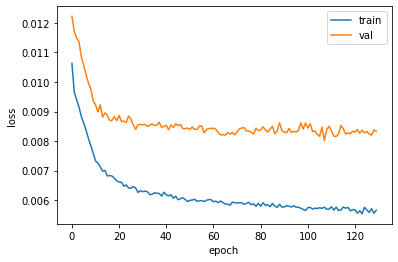

In [ ]:
plt.plot(train_loss[:])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(val_loss[:])
plt.legend(['train','val'])
plt.show()

In [ ]:
min_value = min(train_loss) # Lấy 179
print(min_value*1e3)
print(train_loss.index(min_value))
print(val_loss[107])

5.450607230636364
187
0.008014018951843564


In [ ]:
validation(valid_dataset=test)

0.008700375668922788

# Predict với tập test

In [ ]:
test_loss = []
for i in range(200):
  load_model = torch.load('D:/20211/KHDL/KHDL_IT4930/inference/misc/ann_{}.pt'.format(153))
  model.load_state_dict(load_model['model'])
  model.eval()
  loss = validation(test)
  test_loss.append(loss)

plt.plot(test_loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test'])
plt.show()

KeyboardInterrupt: ignored

In [ ]:
min_value = min(test_loss)
print(min_value*1e3)
print(test_loss.index(min_value))
print(test_loss[181])

8.63799142210225
187
0.008827627318868717


In [52]:
load_model = torch.load('D:/20211/KHDL/KHDL_IT4930/inference/misc/ann_{}.pt'.format(162))
model.load_state_dict(load_model['model'])

<All keys matched successfully>

In [53]:
def predict(test_dataset):
    model.eval()
    preds = []
    for batch in tqdm(dataset_batch_iter(test_dataset, batch_size=64), leave=False):
        input_tensor = torch.Tensor(batch['data']).type(torch.FloatTensor).to(device)
        target_tensor = torch.Tensor(batch['label']).type(torch.FloatTensor).to(device)
        
        pred = model(input_tensor).squeeze()
        optimizer.zero_grad()
        preds.extend(pred.tolist())
    return preds

In [54]:
preds = predict(test)
ll = 0
ll = (test_label - preds)**2
print(sum(ll)/ len(preds)) # MSE

0.15543804899583194


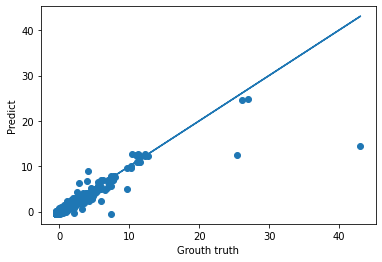

In [56]:
import matplotlib.pyplot as plt
plt.scatter(test_label,preds)
plt.xlabel("Grouth truth")
plt.ylabel("Predict")
plt.plot([i for i in test_label], [i for i in test_label])

# Prediction

In [13]:
import pandas as pd
import numpy as np
import json
import torch

In [12]:
features = json.load(open('/content/drive/MyDrive/KHDL/KHDL_IT4930/info/all_features.json', "r"))
categorical_features = json.load(open('/content/drive/MyDrive/KHDL/KHDL_IT4930/info/categorical_features.json', "r"))
stats = pd.read_csv('/content/drive/MyDrive/KHDL/KHDL_IT4930/info/stats.csv', sep = '\t', index_col=0)

,count,mean,std,min,25%,50%,75%,max
km_da_di,41601.0,1.468959e+05,2.484119e+06,0.000000e+00,20000.0,60000.0,111111.0,3.000000e+08
so_cho_ngoi,41601.0,5.713709e+00,2.231097e+00,1.000000e+00,5.0,5.0,7.0,4.700000e+01
nam_sx,41601.0,2.014454e+03,5.767012e+00,1.980000e+03,2011.0,2016.0,2019.0,2.021000e+03
gia,41601.0,4.652738e+08,5.373558e+08,-2.145967e+09,250000000.0,439000000.0,665000000.0,2.140000e+09
tinh_trang_Mới,41601.0,7.064734e-02,2.562379e-01,0.000000e+00,0.0,0.0,0.0,1.000000e+00
...,...,...,...,...,...,...,...,...
nhien_lieu_Điện,41601.0,1.682652e-04,1.297077e-02,0.000000e+00,0.0,0.0,0.0,1.000000e+00
hop_so_Bán tự động,41601.0,3.701834e-03,6.073071e-02,0.000000e+00,0.0,0.0,0.0,1.000000e+00
hop_so_Số hỗn hợp,41601.0,4.807577e-05,6.933586e-03,0.000000e+00,0.0,0.0,0.0,1.000000e+00
hop_so_Số sàn,41601.0,3.514819e-01,4.774389e-01,0.000000e+00,0.0,0.0,1.0,1.000000e+00


In [45]:
stats_none_price = stats.drop(index=['gia'], axis=1)
stats_none_price

,count,mean,std,min,25%,50%,75%,max
km_da_di,41601.0,146895.905892,2.484119e+06,0.0,20000.0,60000.0,111111.0,300000000.0
so_cho_ngoi,41601.0,5.713709,2.231097e+00,1.0,5.0,5.0,7.0,47.0
nam_sx,41601.0,2014.453571,5.767012e+00,1980.0,2011.0,2016.0,2019.0,2021.0
tinh_trang_Mới,41601.0,0.070647,2.562379e-01,0.0,0.0,0.0,0.0,1.0
tinh_trang_Đã sử dụng,41601.0,0.929353,2.562379e-01,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
nhien_lieu_Điện,41601.0,0.000168,1.297077e-02,0.0,0.0,0.0,0.0,1.0
hop_so_Bán tự động,41601.0,0.003702,6.073071e-02,0.0,0.0,0.0,0.0,1.0
hop_so_Số hỗn hợp,41601.0,0.000048,6.933586e-03,0.0,0.0,0.0,0.0,1.0
hop_so_Số sàn,41601.0,0.351482,4.774389e-01,0.0,0.0,0.0,1.0,1.0


In [16]:
# Load model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Model()
model.to(device=device)

load_model = torch.load('/content/drive/MyDrive/KHDL/KHDL_IT4930/info/ann_{}.pt'.format(107), map_location=device)
model.load_state_dict(load_model['model'])

<All keys matched successfully>

In [17]:
keys = ['dong_xe','hang','hop_so','kieu_dang','km_da_di','nam_sx','nhien_lieu','so_cho_ngoi','tinh_trang','xuat_xu']

In [79]:
features

{'dong_xe_100': 88,
 'dong_xe_100NX': 89,
 'dong_xe_107': 90,
 'dong_xe_1200B': 91,
 'dong_xe_1240T': 92,
 'dong_xe_1490T': 93,
 'dong_xe_159': 94,
 'dong_xe_190': 95,
 'dong_xe_1Series': 96,
 'dong_xe_1T': 97,
 'dong_xe_1T5': 98,
 'dong_xe_1t990': 99,
 'dong_xe_2': 100,
 'dong_xe_200': 101,
 'dong_xe_2008': 102,
 'dong_xe_206': 103,
 'dong_xe_208': 104,
 'dong_xe_2106': 105,
 'dong_xe_2107': 106,
 'dong_xe_24T': 107,
 'dong_xe_2Series': 108,
 'dong_xe_2T': 109,
 'dong_xe_2T4': 110,
 'dong_xe_3': 111,
 'dong_xe_3000GT': 112,
 'dong_xe_3008': 113,
 'dong_xe_300C': 114,
 'dong_xe_300Series': 115,
 'dong_xe_300ZX': 116,
 'dong_xe_323': 117,
 'dong_xe_36T': 118,
 'dong_xe_3Series': 119,
 'dong_xe_405': 120,
 'dong_xe_406': 121,
 'dong_xe_407': 122,
 'dong_xe_408': 123,
 'dong_xe_420': 124,
 'dong_xe_458': 125,
 'dong_xe_46T': 126,
 'dong_xe_488': 127,
 'dong_xe_4Runner': 128,
 'dong_xe_4Series': 129,
 'dong_xe_5': 130,
 'dong_xe_500': 131,
 'dong_xe_5008': 132,
 'dong_xe_505': 133,
 'dong_

In [98]:
example = [
           197000,
           16,
           2014,
           'Đã sử dụng',
           'Toyota',
           'Hiace',
           'Nhập khẩu',
           'Van/Minivan',
           'Xăng',
           "Số sàn"
]
example = dict(zip(keys, example))

In [99]:
example

{'dong_xe': 'Hiace',
 'hang': 'Toyota',
 'hop_so': 'Số sàn',
 'kieu_dang': 'Van/Minivan',
 'km_da_di': 197000,
 'nam_sx': 2014,
 'nhien_lieu': 'Xăng',
 'so_cho_ngoi': 16,
 'tinh_trang': 'Đã sử dụng',
 'xuat_xu': 'Nhập khẩu'}

In [100]:
input = np.zeros((len(features)-1),)

In [101]:
for key, value in example.items():
  if type(value) == int:
    input[features[key]] = value
  else:
    if features[key+'_'+value] > 3:
      input[features[key+'_'+value]-1] = 1
input = ( input - np.array(list(stats_none_price['mean'])) )/np.array(list(stats_none_price['std']))
input = torch.tensor(input, dtype = torch.float).unsqueeze(0).to(device)

In [102]:
input.size()

torch.Size([1, 678])

In [103]:
model.eval()
with torch.no_grad():
    pred = model(input).squeeze().tolist()
    pred = (pred * stats.loc['gia','std']) + stats.loc['gia','mean']
    print(pred)

414739089.88308346
